# Análise Exploratória dos Dados (EDA)
Antes de começar a processar os dados é necessário analisar os mesmos para ter uma noção melhor de como lidar com eles
## Carácterísticas importantes
O contexto em análise é o processamento de Linguagem Natural, logo será analisada a frequência relativa de aparições de cada palavra em cada conjunto de classificação para que com isso possa ser feita uma futura classificação de tweets.


In [1]:
import nltk
import pandas as pd
import matplotlib.pyplot as pl
import sklearn
import random
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
from nltk import re
from nltk import FreqDist
lemma = WordNetLemmatizer()
nltk.download('wordnet')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
feature_data = pd.read_csv('../Dataset/train.csv')
feature_data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
import matplotlib.pyplot as pl
import numpy as np
def plot(labels, sizes, tag):
    if tag:
        colors = ['yellowgreen', 'lightcoral', 'orange']
        patches, texts, value = pl.pie(sizes, colors=colors, shadow=True, startangle=90,autopct='%1.3f%%')
        pl.legend(patches, labels, loc="best")
        pl.axis('equal')
        pl.tight_layout()
    else:
        x = np.arange(len(labels))
        fig, ax = pl.subplots()
        pl.bar(x, sizes)
        pl.xticks(x, labels)
    pl.show()

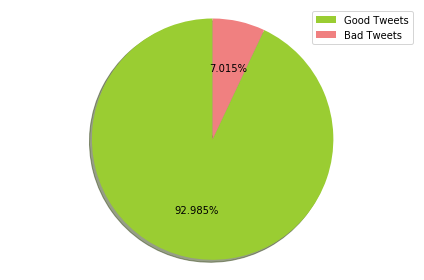

In [4]:
labels = ['Good Tweets', 'Bad Tweets']
good = [good for good in feature_data['label'] if good == 0]
bad = [bad for bad in feature_data['label'] if bad == 1]
sizes = [ len(good),len(bad)]
plot(labels, sizes, 1)

## Análise da natureza dos dados
Após realizada a análise gráfica de alguns dados é possível extrair algumas informações como a relação percentual de cada classe nos casos de treino: 7.015% com discurso de ódio e 92.985% sem discurso de ódio, assim como a frequência das 10 palavras mais utilizadas em cada classe (com exceção de alguns termos considerados irrelevantes).

# Pré Processamento
## Separação de dados para análise estatística
Após analisar a separação dos dados foi observado que diversos termo utilizados não têm tanto significado no contexto proposto para esse projeto, logo utilizou-se a dependencia nltk para eliminar alguns termos da lingua inglesa que não convém à análise, assim como outros termos analisados, tais quais: '@user', '&amp', '-', dentre outros.

## Método
Os casos de treino serão divididos respeitando a proporção total dos casos para que se tenham resultados mais concisos. Tendo feito isso serão criadas duas listas de frequência relativa para que seja feita uma futura comparação entre os outros casos de treino e assim obter uma média de resultados.

## Features
A feature analisada nesse contexto será a frequência relativa de cada palavra no contexto das classes de discurso de ódio e não discurso de ódio.

In [5]:
def separate_hashtags(message):
    string = " ".join(filter(lambda w: w[0]== '#', message.split()))
    string = re.sub('[^a-zA-Z]',' ',  string)
    string = string.lower()
    string = [lemma.lemmatize(word) for word in string]
    string = "".join(string)
    return string

In [6]:
feature_data['hashtag'] = feature_data.tweet.apply(separate_hashtags)
feature_data.head()

,id,label,tweet,hashtag
0,1,0,@user when a father is dysfunctional and is s...,run
1,2,0,@user @user thanks for #lyft credit i can't us...,lyft disapointed getthanked
2,3,0,bihday your majesty,
3,4,0,#model i love u take with u all the time in ...,model
4,5,0,factsguide: society now #motivation,motivation


In [7]:
def filter_messages(message):
    string = " ".join(filter(lambda x: x[0]!= '@', message.split()))
    string = re.sub('[^a-zA-Z]',' ',  string)
    string = string.lower()
    string = [lemma.lemmatize(word) for word in string]
    string = "".join(string)
    return string

In [8]:
feature_data['filtered'] = feature_data.tweet.apply(filter_messages)

In [9]:
good_tweets = feature_data[feature_data['label'] == 0]
good_tweets.head()

,id,label,tweet,hashtag,filtered
0,1,0,@user when a father is dysfunctional and is s...,run,when a father is dysfunctional and is so selfi...
1,2,0,@user @user thanks for #lyft credit i can't us...,lyft disapointed getthanked,thanks for lyft credit i can t use cause they...
2,3,0,bihday your majesty,,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model,model i love u take with u all the time in ur...
4,5,0,factsguide: society now #motivation,motivation,factsguide society now motivation


In [10]:
bad_tweets = feature_data[feature_data['label'] != 0]
bad_tweets.head()

,id,label,tweet,hashtag,filtered
13,14,1,@user #cnn calls #michigan middle school 'buil...,cnn michigan tcot,cnn calls michigan middle school build the ...
14,15,1,no comment! in #australia #opkillingbay #se...,australia opkillingbay seashepherd helpcov...,no comment in australia opkillingbay seash...
17,18,1,retweet if you agree!,,retweet if you agree
23,24,1,@user @user lumpy says i am a . prove it lumpy.,,lumpy says i am a prove it lumpy
34,35,1,it's unbelievable that in the 21st century we'...,neverump xenophobia,it s unbelievable that in the st century we ...


Após a separação dos dados é necessário que seja extraida a frequencia relativa de cada feature nos tweets

In [11]:
good_words = [w for string in good_tweets['filtered'] for w in string.split() ]
good_frequency = FreqDist(good_words)
bad_words = [w for string in bad_tweets['filtered'] for w in string.split() ]
bad_frequency = FreqDist(bad_words)
good_hashtag_frequency = [hashtag for hashtags in good_tweets['hashtag'] for hashtag in hashtags.split()]
bad_hashtag_frequency = [hashtag for hashtags in bad_tweets['hashtag'] for hashtag in hashtags.split()]

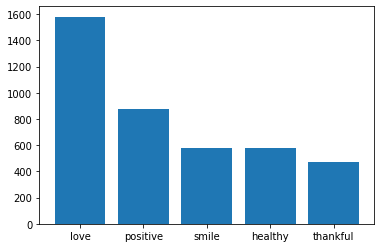

In [12]:
good_hash = list(FreqDist(good_hashtag_frequency).most_common(5))
labels = [elem[0] for elem in good_hash]
sizes = [elem[1] for elem in good_hash]
plot(labels, sizes, 0)

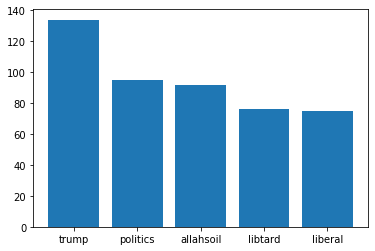

In [13]:
bad_hash = list(FreqDist(bad_hashtag_frequency).most_common(5))
labels = [elem[0] for elem in bad_hash]
sizes = [elem[1] for elem in bad_hash]
plot(labels, sizes, 0)

## Separar casos de treino para obter um teste inicial
### Seleção para classificação
Foram escolidos os 15.500 primeiro tweets para serem a base de teste e o restantes dos tweets foi utilizado como treino, esses valores foram escolhidos arbitrariamente e podem ser alterados para obter diferentes valores de acerto na classificação.

In [38]:
range_of_train = random.randint(10000, 15500)

In [39]:
train_set = feature_data[feature_data['id'] > range_of_train]
train_set.head()

,id,label,tweet,hashtag,filtered
15389,15390,0,the weekend is here!! positive vibes only!ð...,quote motivation lovelife positivity,the weekend is here positive vibes only ...
15390,15391,0,hope i made the guy behind me @user morning by...,gooddeeds,hope i made the guy behind me morning by payin...
15391,15392,0,@user the players i admire were able to set a...,disappointed,the players i admire were able to set aside th...
15392,15393,0,@user today i grieve while trump seeks fuher ...,shameful orlando,today i grieve while trump seeks fuher recogni...
15393,15394,0,so senseless! rip,,so senseless rip


In [40]:
good_train = train_set[train_set['label'] == 0]
bad_train = train_set[train_set['label'] == 1]

In [41]:
freq_good_hash = FreqDist([h for hashtag in good_train.hashtag for h in hashtag.split()])
freq_bad_hash = FreqDist([h for hashtag in bad_train.hashtag for h in hashtag.split()])

In [42]:
freq_good_word = FreqDist([w for string in good_train.filtered for w in string.split()])
freq_bad_word = FreqDist([w for string in bad_train.filtered for w in string.split()])

In [43]:
def get_relative(frequencies, total):
    for word in frequencies:
        frequencies[word] /= total
    return frequencies

In [44]:
relative_good_word = get_relative(freq_good_word, freq_good_word.N())
relative_bad_word = get_relative(freq_bad_word, freq_bad_word.N())
relative_good_hash = get_relative(freq_good_hash, freq_good_hash.N())
relative_bad_hash = get_relative(freq_bad_hash, freq_bad_hash.N())

In [45]:
def classify(test, max_size):
    classification = {'right_guess': 0, 'false_rejection': 0, 'false_acceptance': 0}
    for data in range(max_size):
        is_good = 0
        is_bad = 0
        for word in test.tweet[data].split():
            if word in relative_good_word:
                is_good += relative_good_word[word]
            if word in relative_bad_word:
                is_bad += relative_bad_word[word]
        for word in test.hashtag[data].split():
            if word in relative_good_word:
                is_good += relative_good_hash[word]
            if word in relative_bad_word:
                is_bad += relative_bad_hash[word]
        if is_bad >= is_good:
            if test.label[data] == 1:
                classification['right_guess'] += 1
            else:
                classification['false_rejection'] += 1
        else:
            if test.label[data] == 1:
                classification['false_acceptance'] += 1
            else:
                classification['right_guess'] += 1
    return classification

In [46]:
test_set = feature_data[feature_data['id'] <= range_of_train]
test_set.head()

,id,label,tweet,hashtag,filtered
0,1,0,@user when a father is dysfunctional and is s...,run,when a father is dysfunctional and is so selfi...
1,2,0,@user @user thanks for #lyft credit i can't us...,lyft disapointed getthanked,thanks for lyft credit i can t use cause they...
2,3,0,bihday your majesty,,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model,model i love u take with u all the time in ur...
4,5,0,factsguide: society now #motivation,motivation,factsguide society now motivation


## Métrica
A métrica escolhida foi a de precisão, onde as classificações foram separadas entre "Acerto" (quando o tweet é classificado corretamente), "Falsa aceitação" (quando o tweet contém discurso de ódio e é aceito como um tweet bom) e "Falsa rejeição" (quando o tweet é rejeitado mesmo sendo sem discurso de ódio) como pode-se observar no gráfico abaixo.

RIGHT GUESS: 10961
FALSE REJECTION: 4213
FALSE ACCEPTANCE: 215


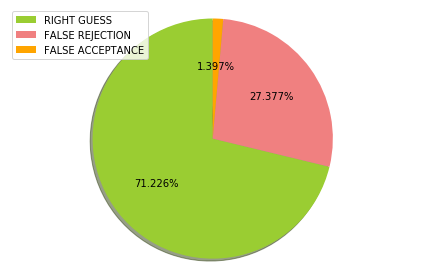

In [47]:
classification = classify(test_set, range_of_train)
print('RIGHT GUESS:', classification['right_guess'])
print('FALSE REJECTION:', classification['false_rejection'])
print('FALSE ACCEPTANCE:', classification['false_acceptance'])
plot(['RIGHT GUESS', 'FALSE REJECTION', 'FALSE ACCEPTANCE'], [classification['right_guess'], classification['false_rejection'], classification['false_acceptance']], 1)